### __EDA__

In [1]:
from utils import *

### __レコードデータ__

In [2]:
train = pd.read_csv(DATA_DIR / "train_records.csv")
test = pd.read_csv(DATA_DIR / "test_records.csv")

train.shape, test.shape

((108, 8), (45, 7))

In [3]:
train.head()

,id,subject_id,night,age,sex,lights_off,psg,hypnogram
0,3c1c5cf,07c46da,1,90,male,23:28:00,3c1c5cf-PSG.edf,3c1c5cf-Hypnogram.edf
1,8fbd71b,07c46da,2,90,male,01:29:00,8fbd71b-PSG.edf,8fbd71b-Hypnogram.edf
2,9d5e9ec,21969ff,1,51,female,23:10:00,9d5e9ec-PSG.edf,9d5e9ec-Hypnogram.edf
3,e0df8c0,21969ff,2,51,female,23:15:00,e0df8c0-PSG.edf,e0df8c0-Hypnogram.edf
4,3e404fc,22b58e8,1,51,female,22:38:00,3e404fc-PSG.edf,3e404fc-Hypnogram.edf


In [4]:
test.head()

,id,subject_id,night,age,sex,lights_off,psg
0,53c1555,17ca2cd,1,91,female,00:15:00,53c1555-PSG.edf
1,29ef1d5,17ca2cd,2,91,female,23:39:00,29ef1d5-PSG.edf
2,c90b6e7,2c77159,1,56,female,23:55:00,c90b6e7-PSG.edf
3,a61e635,2c77159,2,56,female,00:13:00,a61e635-PSG.edf
4,2cb6860,40dc0bc,1,52,male,23:03:00,2cb6860-PSG.edf


In [5]:
# sweetviz
output = DATA_DIR / "sweetviz.html"
if not os.path.exists(output):
    sv.compare([train, 'Train'], [test, 'Test']).show_html(output) 

In [6]:
# 訓練データとテストデータで被験者の重複は無し
len(set(train["subject_id"].unique()) & set(test["subject_id"].unique()))

0

In [7]:
# 各被験者が実験を行った回数(Train)
num_train_exps = train.groupby("subject_id")["id"].size().reset_index().groupby("id").size().reset_index()
num_train_exps.columns = ["実験回数", "被験者数"]
pd.DataFrame(num_train_exps)

,実験回数,被験者数
0,1,2
1,2,53


In [8]:
# 各被験者が実験を行った回数(Test)

num_test_exps = test.groupby("subject_id")["id"].size().reset_index().groupby("id").size().reset_index()
num_test_exps.columns = ["実験回数", "被験者数"]
pd.DataFrame(num_test_exps)

,実験回数,被験者数
0,1,1
1,2,22


In [9]:
# パスを設定

train["hypnogram"] = train["hypnogram"].map(lambda x: str(EDF_DIR / x))
train["psg"] = train["psg"].map(lambda x: str(EDF_DIR / x))
test["psg"] = test["psg"].map(lambda x: str(EDF_DIR / x))

### __チャンネル詳細__

- EEG： 脳波。すべての予測段階の判定に必要であり、意識水準と対応して変化する

    - Fpz-Cz、Pz-Ozは頭に取り付けるセンサー箇所の箇所の電位差を表す

- EOG： 眼電図。 眼球運動を測定。

    - horizontalは水平方向に取り付けた電位差を表す

- EMG： オトガイ(顎下)筋電図。

- Resp oro-nasal：口鼻呼吸

- Temp rectal：直腸温 (原著に記載がないため、実際に直腸の温度を計測したかどうかは不明)

- Event marker：各時刻で起きたイベントの時刻

In [10]:
train_epochs = load_epoch("train")
test_epochs = load_epoch("test")

In [12]:
index = 0
epoch = train_epochs[index]
epoch_df = epoch.to_data_frame(verbose=False)
epoch_df["meas_time"] = pd.date_range(start=epoch.info["meas_date"].replace(tzinfo=None), periods=len(epoch_df), freq=pd.Timedelta(1 / 100, unit="s"))
epoch_df

,time,condition,epoch,EEG Fpz-Cz,EEG Pz-Oz,EOG horizontal,Resp oro-nasal,EMG submental,Temp rectal,Event marker,meas_time
0,0.00,Sleep stage W,0,-80.295971,0.368254,-42.711355,3.100000e+07,3.314000,1.427192e+07,9.530000e+08,1989-11-13 16:35:00.000
1,0.01,Sleep stage W,0,-32.252991,7.074481,-30.367033,3.092531e+07,3.313483,1.427161e+07,9.526826e+08,1989-11-13 16:35:00.010
2,0.02,Sleep stage W,0,-88.165079,6.782906,-54.561905,3.084926e+07,3.312963,1.427131e+07,9.523656e+08,1989-11-13 16:35:00.020
3,0.03,Sleep stage W,0,15.893529,12.517216,-14.566300,3.077191e+07,3.312441,1.427100e+07,9.520494e+08,1989-11-13 16:35:00.030
4,0.04,Sleep stage W,0,23.555556,15.724542,-29.873260,3.069332e+07,3.311918,1.427068e+07,9.517339e+08,1989-11-13 16:35:00.040
...,...,...,...,...,...,...,...,...,...,...,...
4289995,29.95,Sleep stage 1,1429,7.092552,1.145788,3.209524,3.298500e+07,3.336563,1.424834e+07,9.379142e+08,1989-11-14 04:29:59.950
4289996,29.96,Sleep stage 1,1429,0.155311,2.506471,7.653480,3.239297e+07,3.336464,1.424828e+07,9.377232e+08,1989-11-14 04:29:59.960
4289997,29.97,Sleep stage 1,1429,6.574847,5.616606,2.715751,3.179811e+07,3.336358,1.424822e+07,9.375361e+08,1989-11-14 04:29:59.970
4289998,29.98,Sleep stage 1,1429,-6.678388,9.990232,14.566300,3.120076e+07,3.336245,1.424818e+07,9.373531e+08,1989-11-14 04:29:59.980


In [13]:
def plot_by_epoch(epoch_df):
    plt.figure(figsize=(20, 20))
    plt.subplots_adjust(hspace=0.4)
    
    plt.subplot(8, 1, 1)
    plt.title("CONDITION")
    plt.plot(epoch_df.meas_time, epoch_df.condition.map(LABEL2ID), c="r")
    plt.yticks(range(-1, 5))
    
    time_by_epoch = epoch_df.groupby("epoch")["meas_time"].min()
    for i, col in enumerate(['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']):
        plt.subplot(8, 1, i+2)
        plt.title(col)
        plt.plot(
            time_by_epoch,
            epoch_df.groupby("epoch")[col].mean()
        )
    plt.show()

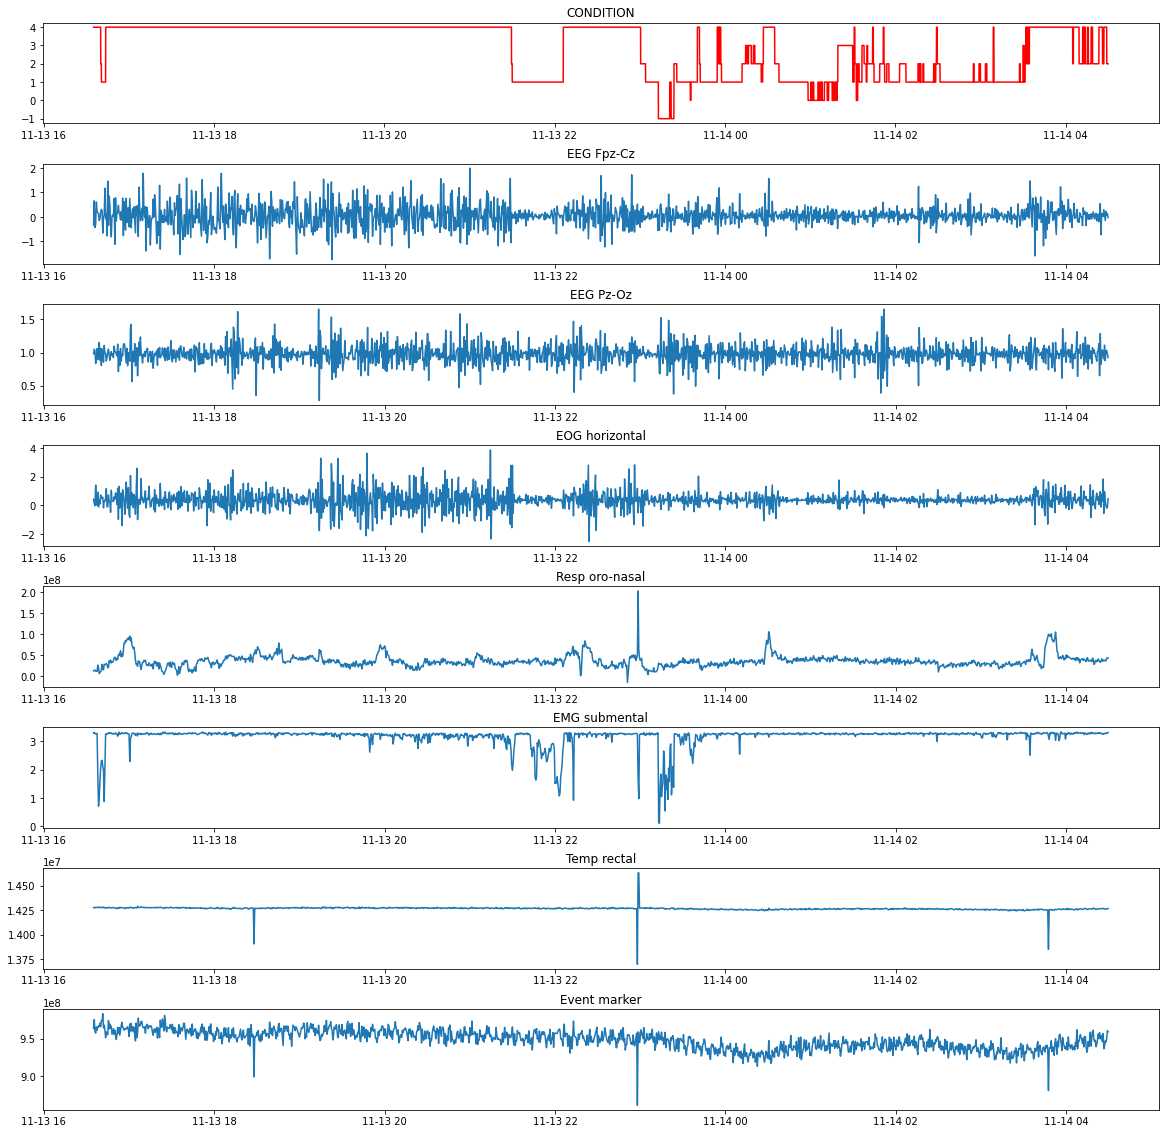

In [14]:
plot_by_epoch(epoch_df)